In [43]:
from visuals.visuals_util import visualize_pointcloud_eval, visualize_pointcloud_eval_three, visualize_pointcloud
import torch
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [22]:
input, noised_input, output = (torch.load(p, map_location=torch.device('cpu')).transpose(1, 2) for p in [f"eval-results/data-for-visualization/{name}" for name in ["global-refinement-input.pth", "global-refinement-noised-input.pth", "global-refinement-output.pth"]])
pvd_airplane = torch.load("pvd_output/airplane_pc_data.pth", map_location=torch.device('cpu'))

In [23]:
print(input.shape, noised_input.shape, output.shape, pvd_airplane.shape)

torch.Size([20, 2048, 3]) torch.Size([20, 2048, 3]) torch.Size([20, 2048, 3]) torch.Size([27, 2048, 3])


/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_23898/2427519374.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  visualize_pointcloud(input[6], show_axis=False).show()
/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_23898/2427519374.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  visualize_pointcloud(output[6], show_axis=False).show()


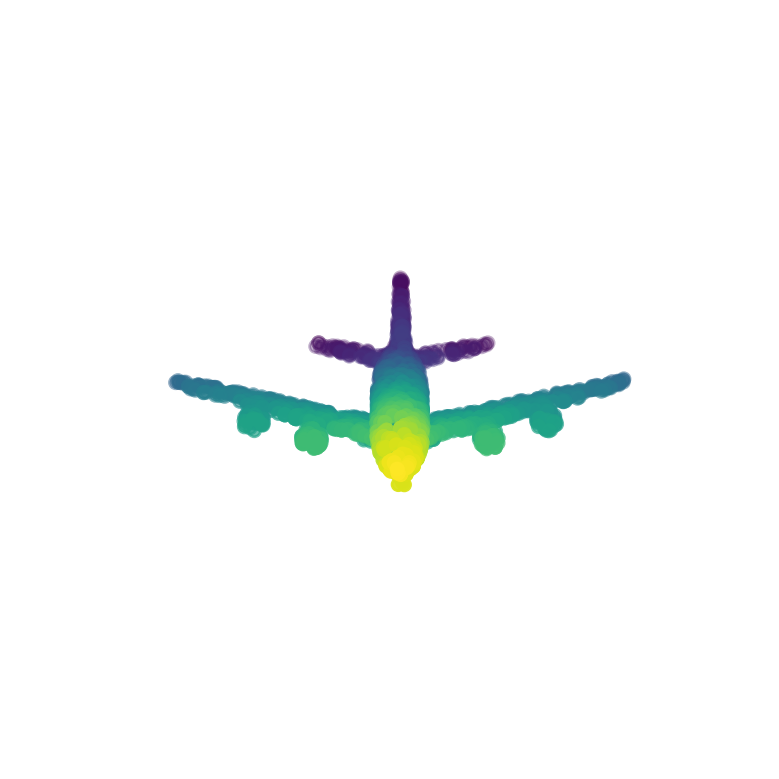

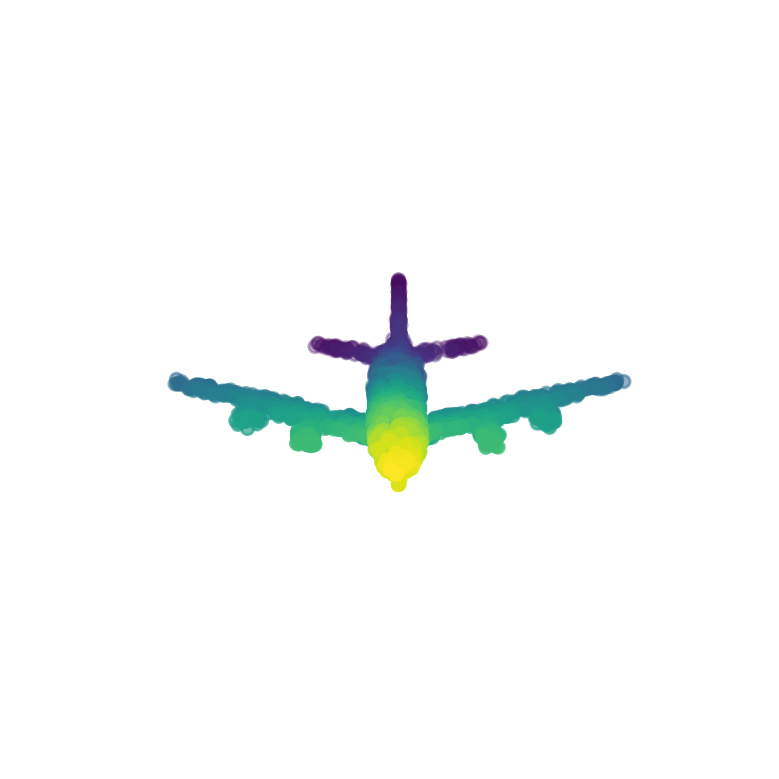

In [36]:
batch_index = 0
visualize_pointcloud(input[6], show_axis=False).show()
visualize_pointcloud(output[6], show_axis=False).show()
# visualize_pointcloud(noised_input[batch_index])

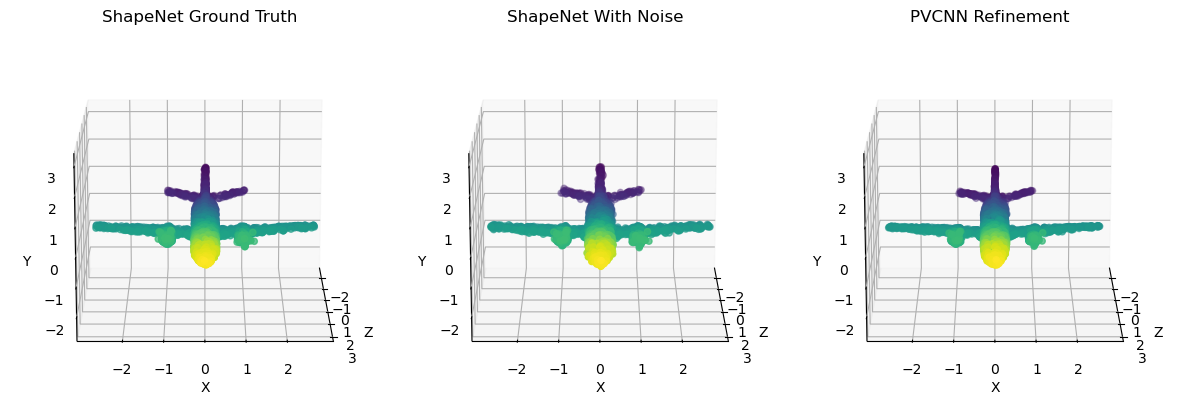

In [18]:
fig = visualize_pointcloud_eval_three(input[batch_index], noised_input[batch_index], output[batch_index], title1="ShapeNet Ground Truth", title2="ShapeNet With Noise", title3="PVCNN Refinement")
fig.savefig("visuals/global-refinement.png", dpi=400)

In [81]:
pr_input, pr_noised_input, pr_output_patches, pr_output= (torch.load(f"eval-results/data-for-visualization/{name}.pth", map_location=torch.device('cpu')) for name in ("patched-refinement-input", "patched-refinement-noised-input", "patched-refinement-denoised-output", "patched-refinement-denoised-output-no-patch") )

In [84]:
print([x.shape for x in (pr_input, pr_noised_input, pr_output_patches, pr_output)])

[torch.Size([20, 4, 512, 3]), torch.Size([20, 4, 512, 3]), torch.Size([20, 4, 512, 3]), torch.Size([20, 2048, 3])]


In [92]:
def plot(pc):
    return visualize_pointcloud(pc, axis_ranges=[[-3, 3] for _ in range(3)], show_axis=False)

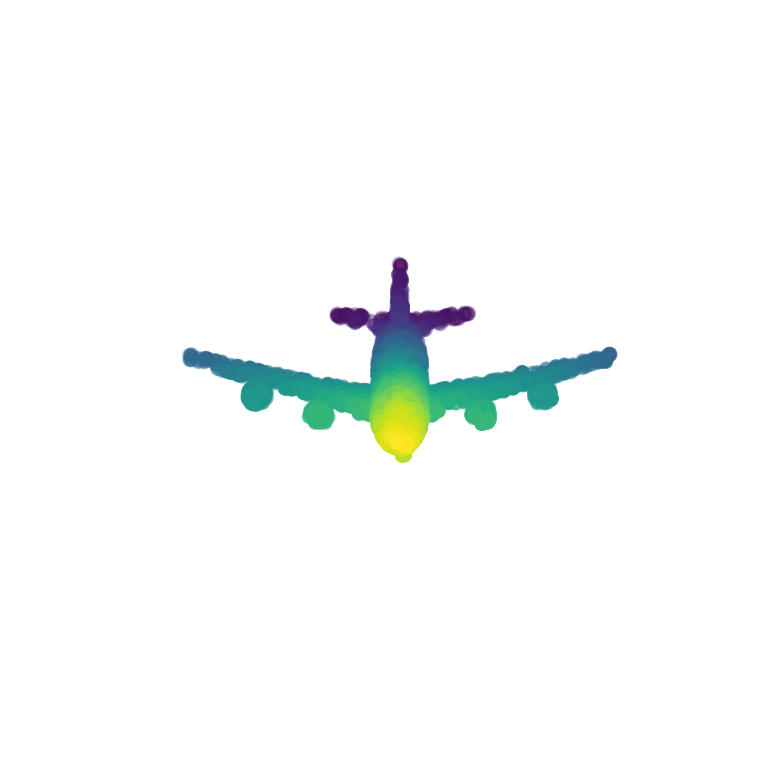

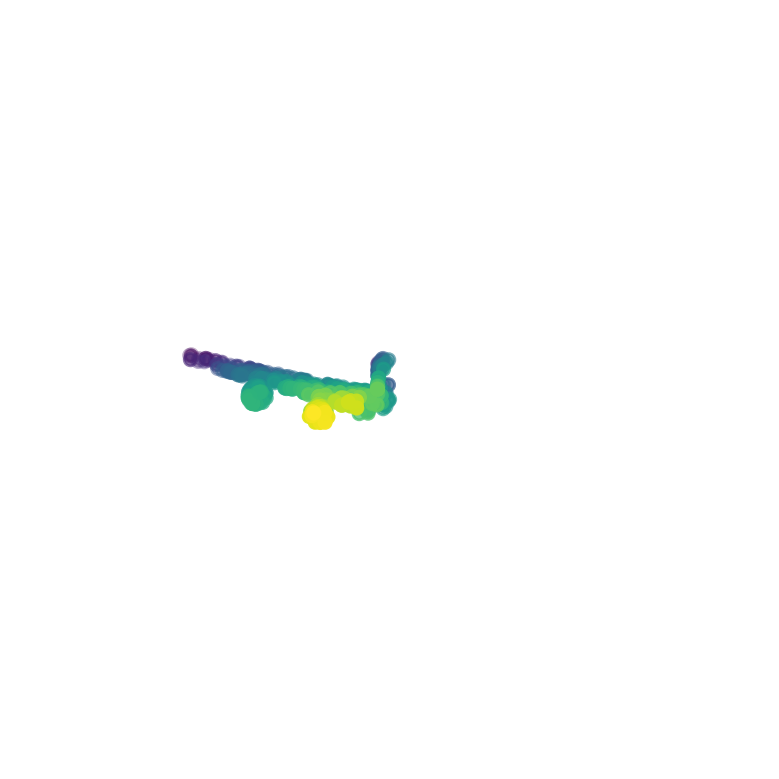

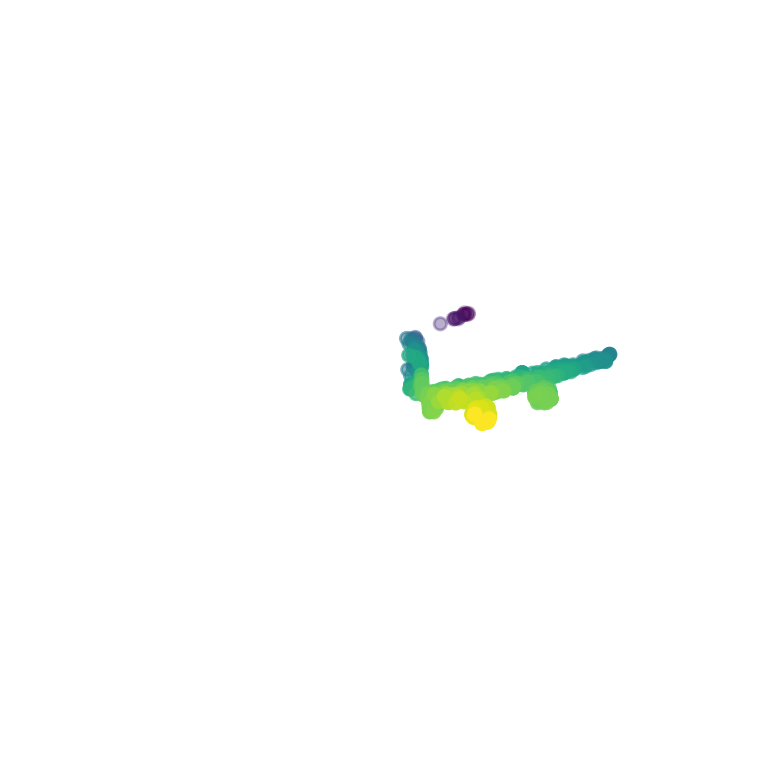

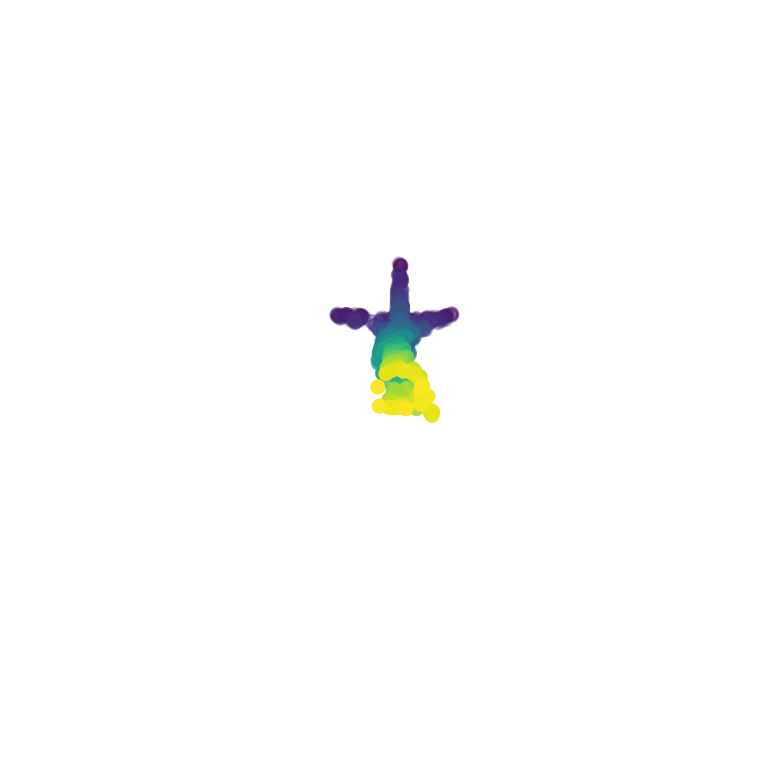

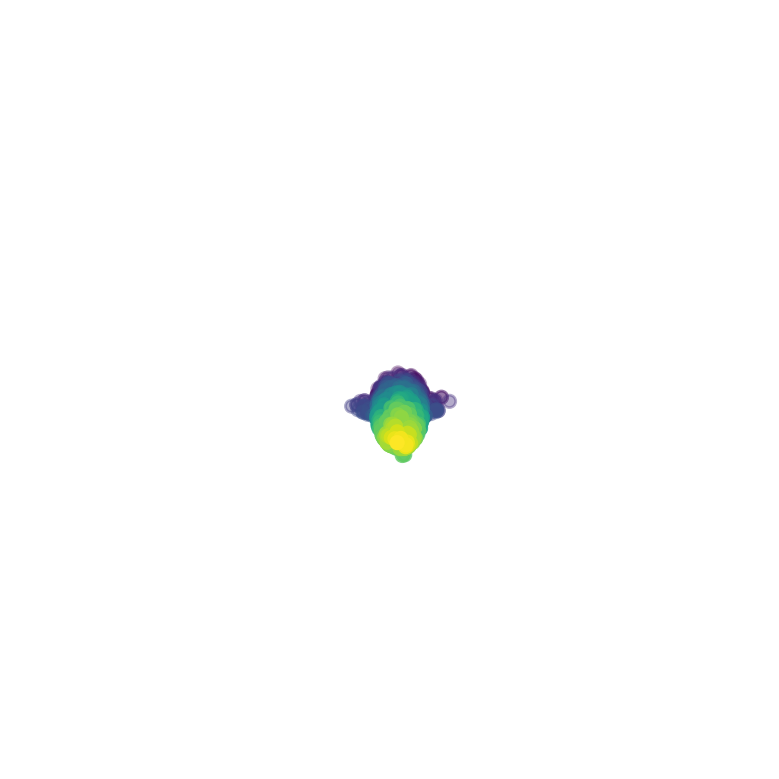

In [107]:
interesting_index = 11 # good: 2, 8, 11, 19
plot((complete_input := pr_input[interesting_index].resize(2048, 3)))
for index, pc in enumerate(pr_input[interesting_index]):
    plot(pc).savefig(f"visuals/patched-refinement-input-{index}.png")

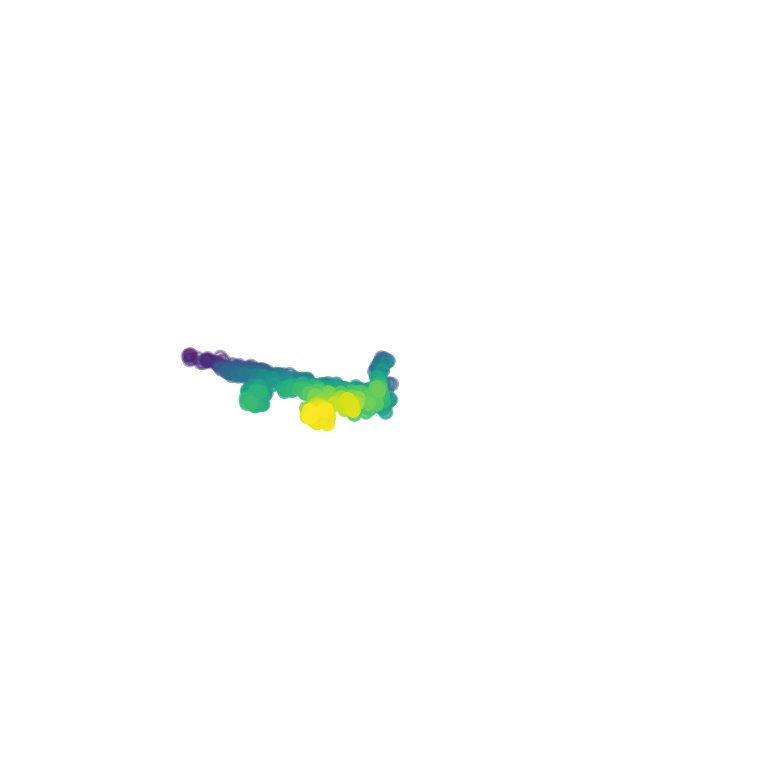

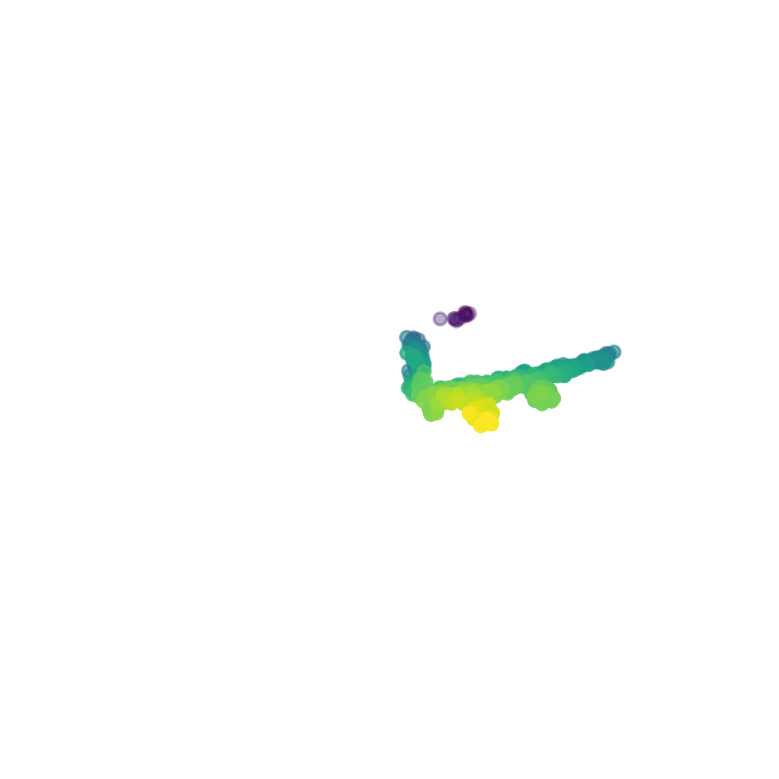

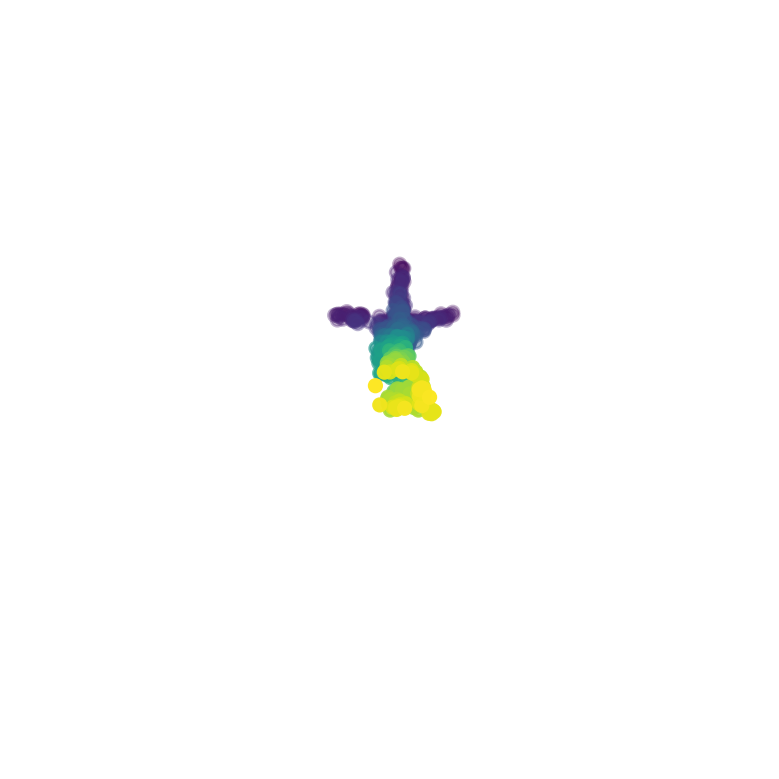

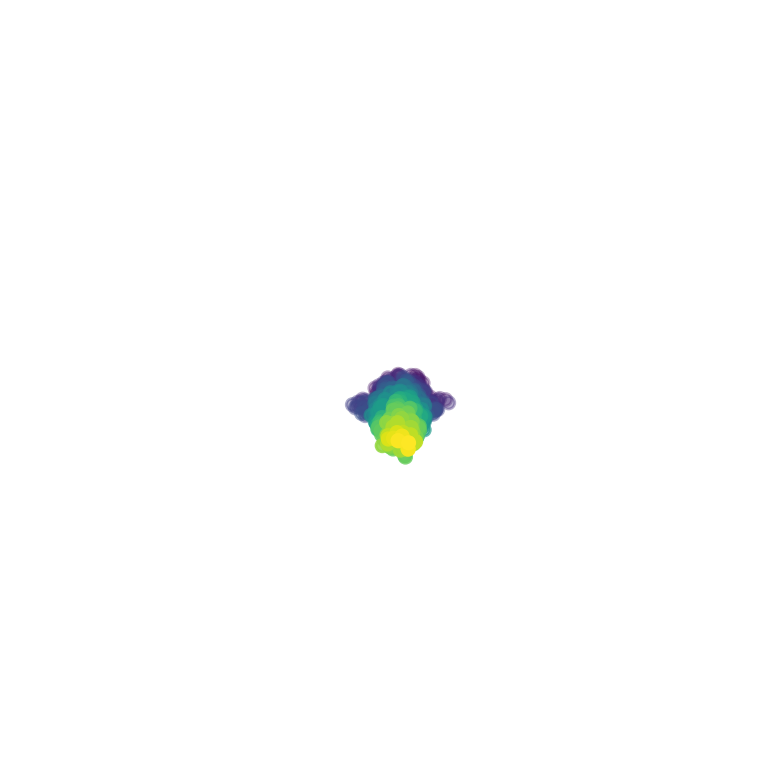

In [108]:
for index, pc in enumerate(pr_noised_input[interesting_index]):
    plot(pc).savefig(f"visuals/patched-refinement-noised-input-{index}.png")

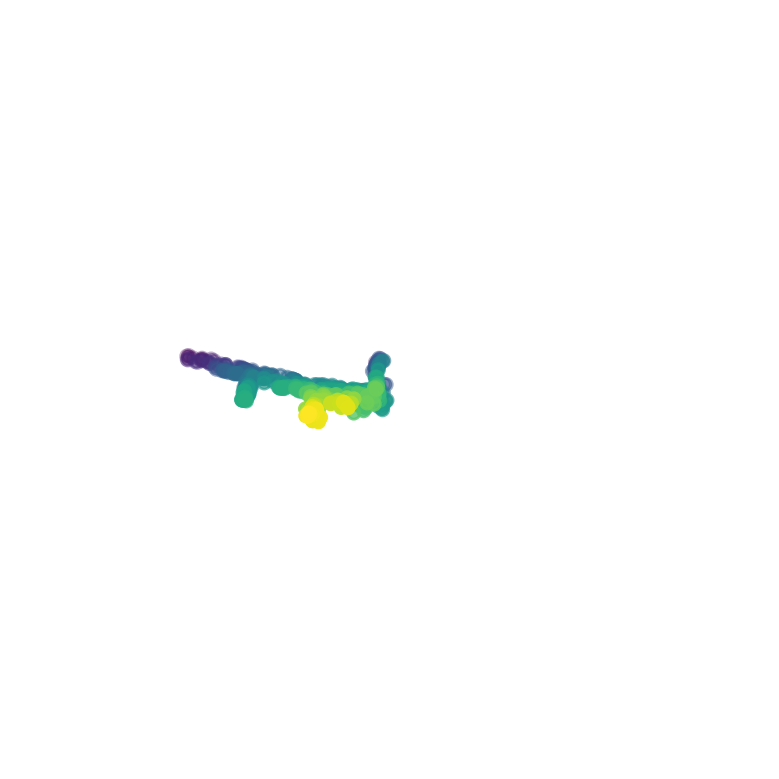

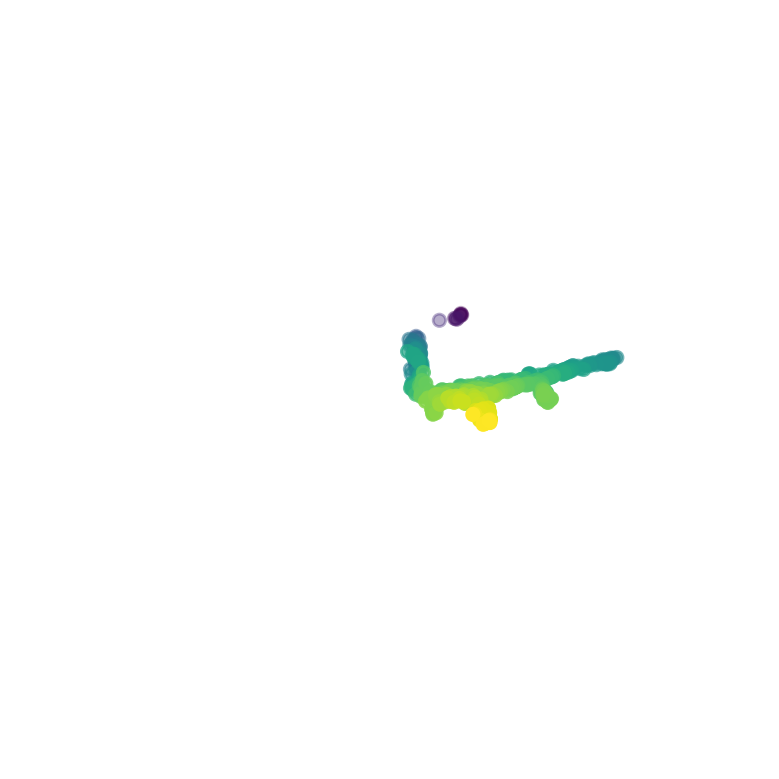

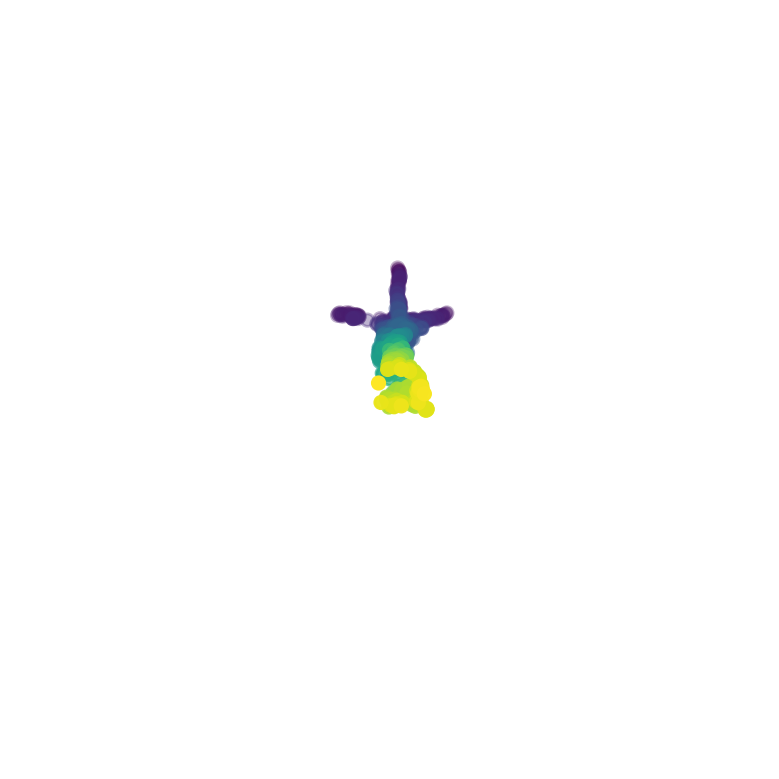

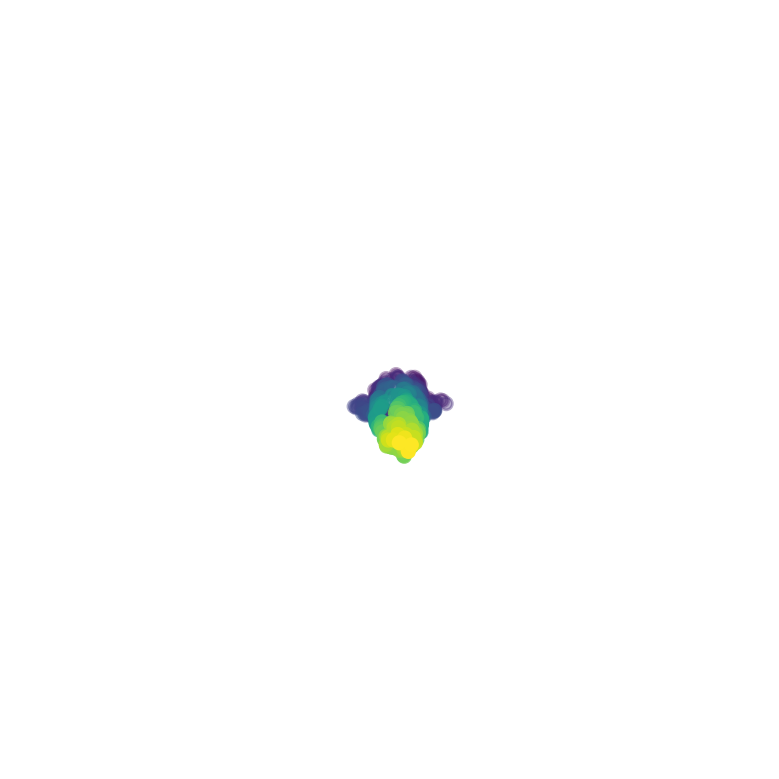

In [116]:
for index, pc in enumerate(pr_output_patches[interesting_index]):
    plot(pc).savefig(f"visuals/patched-refinement-denoised-output-patch-{index}.png")

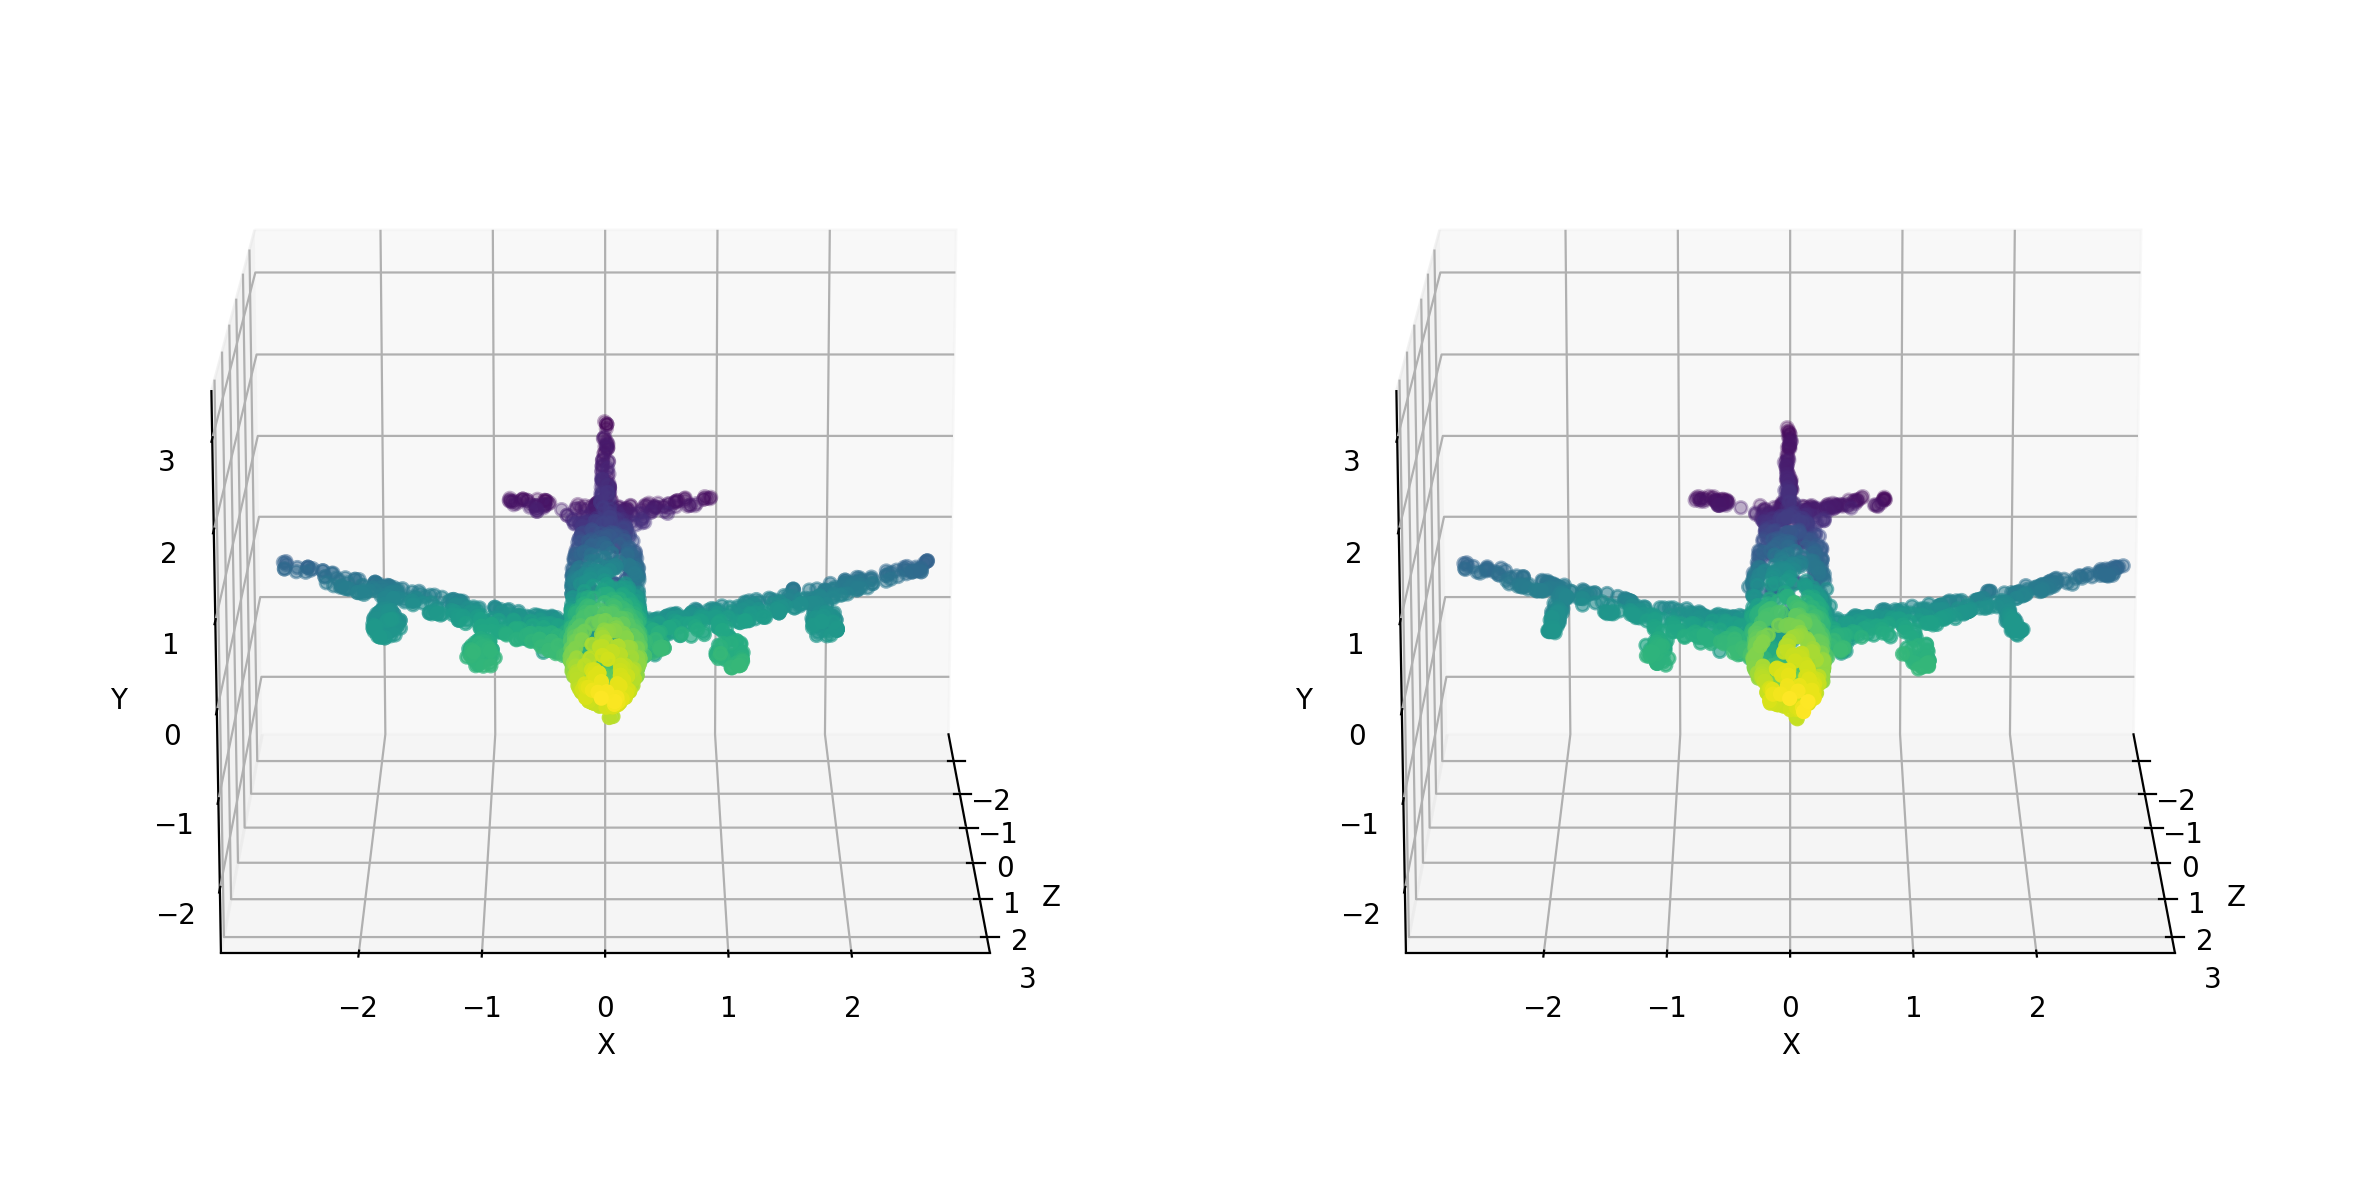

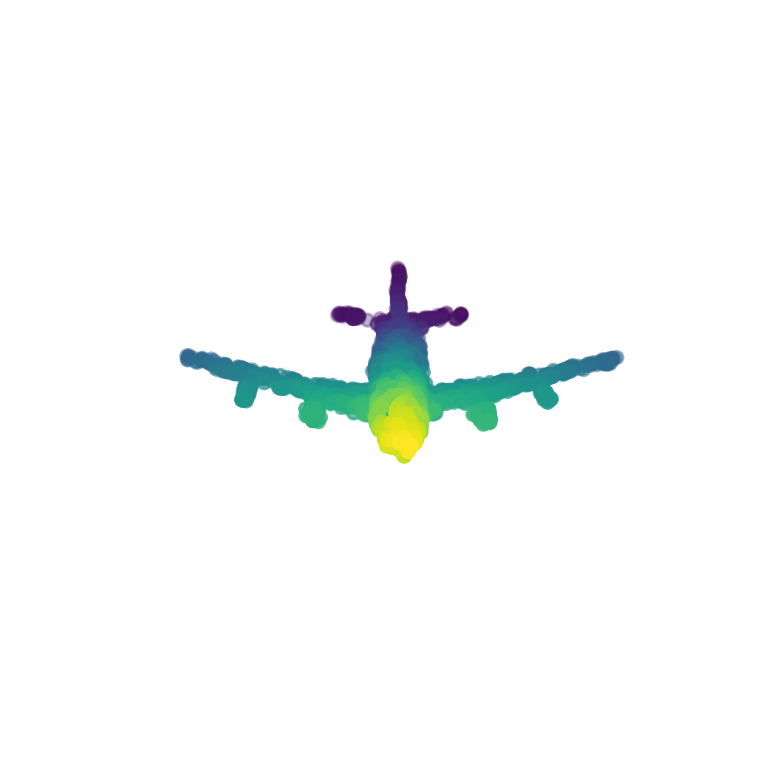

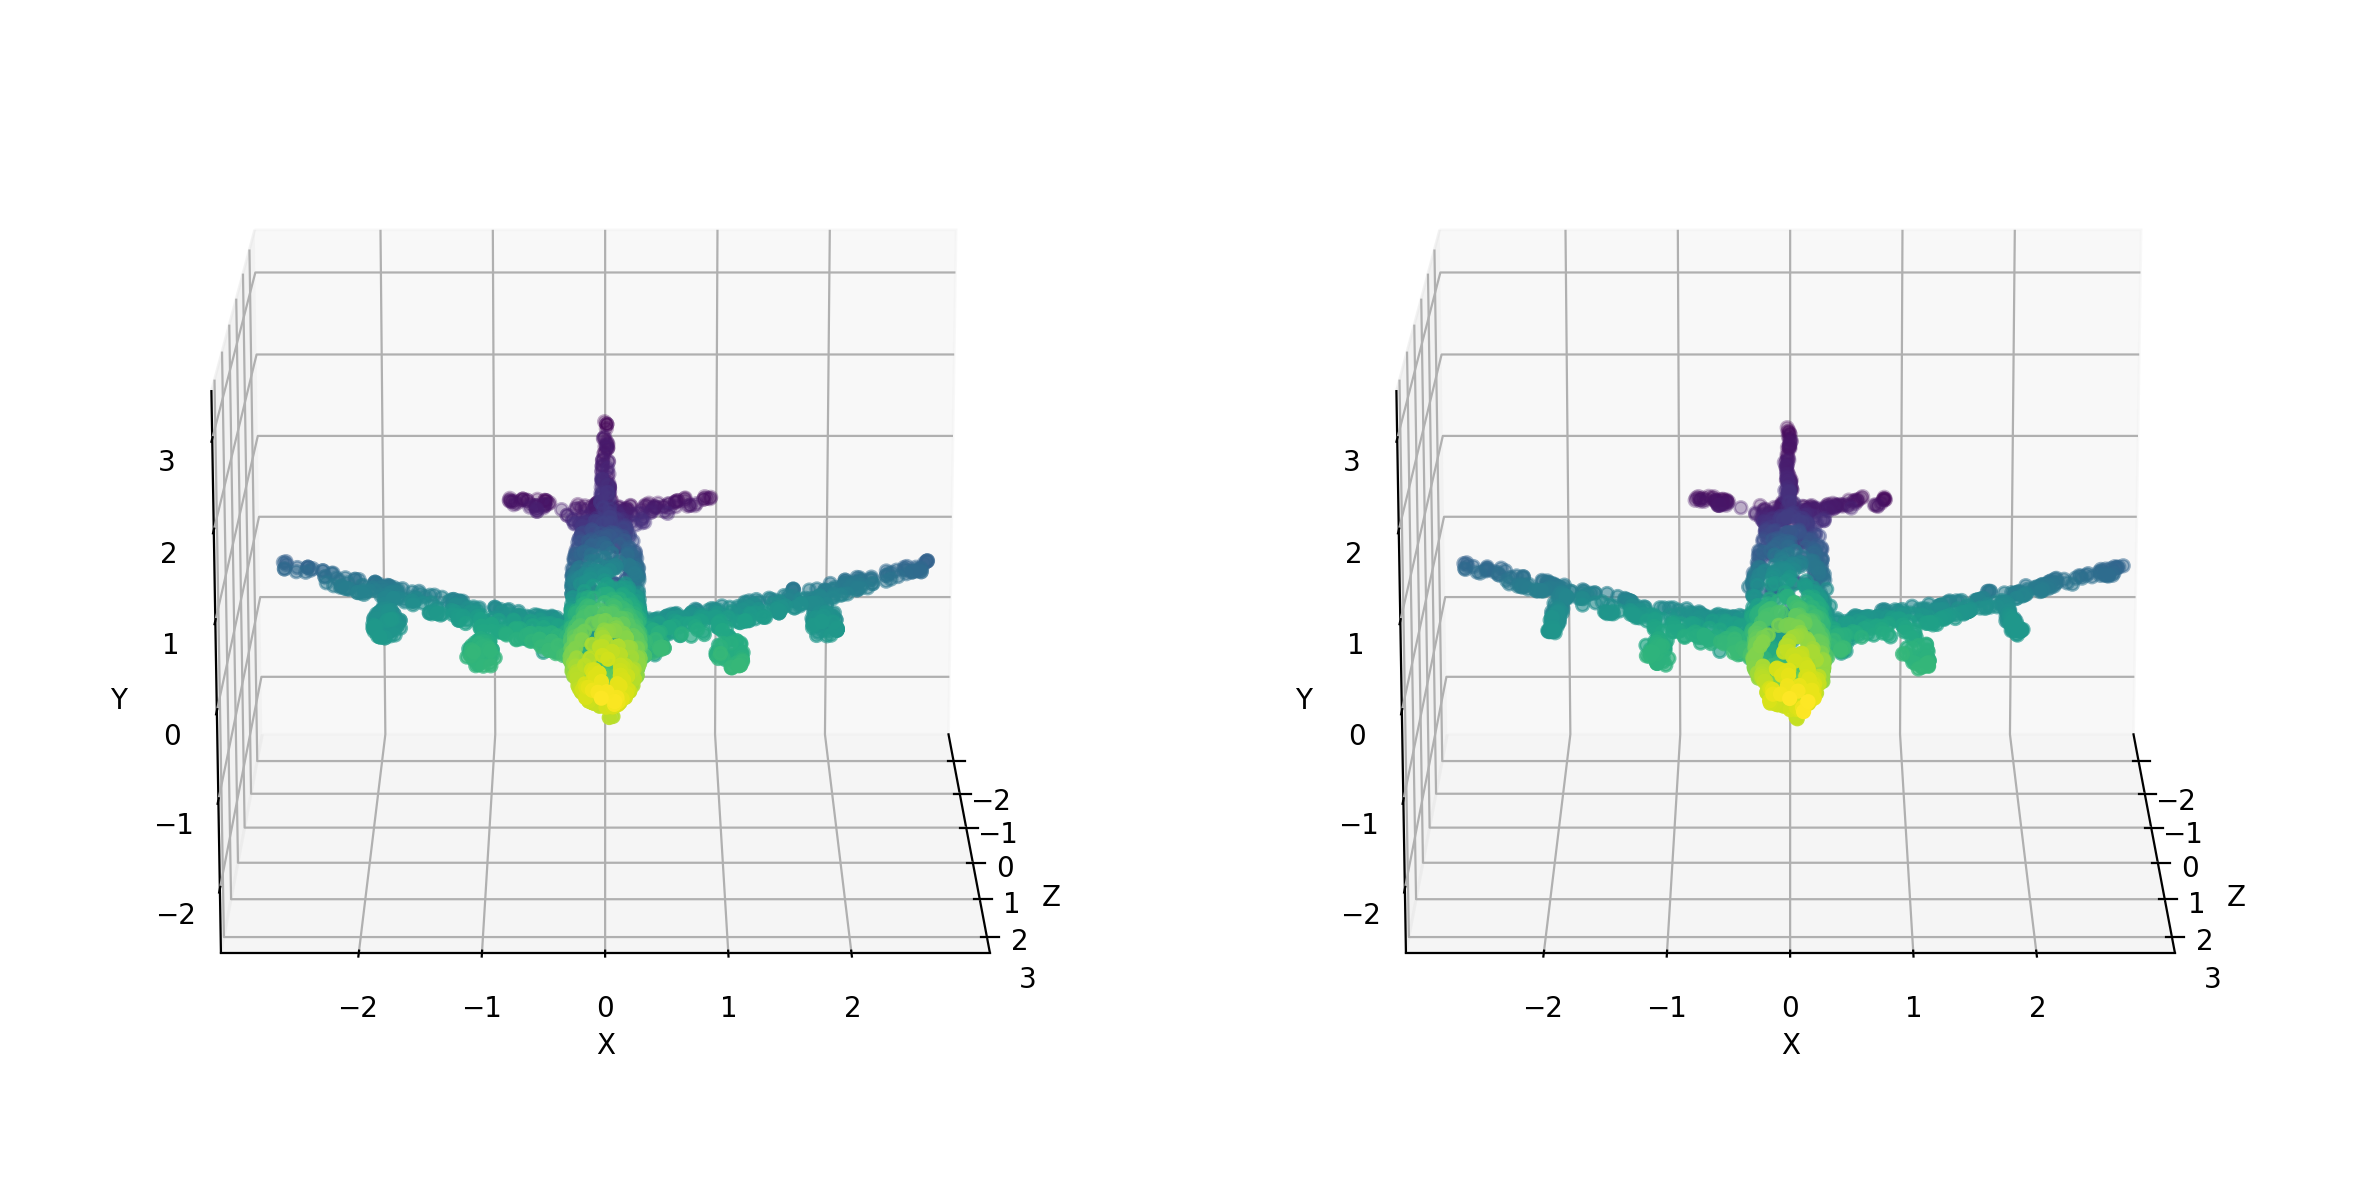

In [109]:
plot(pr_output[interesting_index]).savefig(f"visuals/patched-refinement-output.png")

visualize_pointcloud_eval(complete_input, pr_output[interesting_index])

In [111]:
from PIL import Image

def center_crop_image(image_path, output_size):
    """
    Crop the center of an image.

    Parameters:
    image_path (str):
    """
    with Image.open(image_path) as img:
        width, height = img.size

        # Calculate coordinates to crop the center
        left = (width - output_size[0]) / 2
        top = (height - output_size[1]) / 2
        right = (width + output_size[0]) / 2
        bottom = (height + output_size[1]) / 2

        # Crop the center of the image
        img_cropped = img.crop((left, top, right, bottom))
        return img_cropped

In [115]:
for name in ["input", "noised-input", "denoised-output-patch"]:
    for index in range(4):
        center_crop_image(f"visuals/patched-refinement-{name}-{index}.png", (256, 256)).save(f"visuals/patched-refinement-{name}-{index}-cropped.png")


FileNotFoundError: [Errno 2] No such file or directory: 'visuals/patched-refinement-output-0.png'